In [1]:
import scanpy as sc
import pandas as pd
import anndata
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

font_size = 7
rc={'font.size': font_size, 'axes.labelsize': font_size, 'figure.dpi':400, 'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': font_size, 'ytick.labelsize': font_size, 'legend.fontsize':font_size, 
    'legend.markerscale': 0.8, 
    'legend.markerscale': 0.8, 
    'legend.loc': 'center right',
    'legend.borderpad':0,
    'legend.columnspacing': 0.5,
    'legend.labelspacing': 0.2,
    'legend.handletextpad': 0,
    'legend.borderaxespad': 0,
    'legend.handleheight': 0.5,
    'legend.handlelength': 1.0,
    'figure.constrained_layout.h_pad': 0.00001,
    'figure.constrained_layout.w_pad': 0.00001
   }
sns.set(style='ticks',rc=rc) #talk, ticks, paper
sns.set_context("paper", rc=rc)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

centimeter = 1/2.54  # centimeter in inches

In [1]:
import sys
sys.path.append('../../')

In [5]:
adata_bin100 = sc.read_h5ad(
    './result/multiplatform/Mouse_Brain_Bin100.h5ad')
adata_bin100

AnnData object with n_obs × n_vars = 21368 × 27279
    obs: 'array_row', 'array_col'
    obsm: 'spatial'
    layers: 'count'

In [3]:
from scipy.sparse import csr_matrix

In [6]:
sc.pp.normalize_total(adata_bin100, target_sum=1e4)

In [7]:
sc.pp.log1p(adata_bin100, base=2)

In [9]:
adata_bin100.X = csr_matrix(((adata_bin100.to_df() - adata_bin100.to_df().min()) / (adata_bin100.to_df().max() - adata_bin100.to_df().min())).values)

In [18]:
adata_bin100.X

<21368x27279 sparse matrix of type '<class 'numpy.float32'>'
	with 50108225 stored elements in Compressed Sparse Row format>

In [11]:
gene_view = ['Cmss1', 'Lamp5', 'Ttc9b', 'Mbp', 
'Ncdn', 'Neurod6', 'Prkcd', 'Spp1', 
'Sparc', 'Penk', 'Scg2', 'Lmo3', 
'Gng8', 'Gja1', 'Ccdc153', 'Hba-a1']

In [12]:
structure = ['Cortex L1', 'Cortex L2-3', 'Cortex L4-6', 'White matter',
            'Hippocampus cell soma layer', 'Hippocampus cell soma layer', 'Thalamus', 'Reticular nucleus', 
            'Hypothalamus', 'Striatum', 'Striatum-like amygdala nucleus', 'Piriform area', 
            'Medial habenula', 'Astrocyte', 'Ventricle', 'Blood']

In [13]:
import matplotlib.transforms as mtransforms

In [61]:
# clist=[
# '#D1D1D3',
# # '#CCCBD0',
# '#C2BCC8',
# '#B5AEC1',
# '#A89EB5',
# '#978BAD',
# '#83789B',
# '#756894',
# '#635489',
# '#5C4D86',
# '#4F447F',
# '#3F317A',
# '#261F66']    ####紫灰色

In [14]:
clist=['#D3D3D3',
'#CABFD9',
'#BDA7E0',
'#B295E5',
'#A07AEC',
'#9870ED',
'#8157F3',
'#7045F7',
'#653AF8',
'#4E32FB',
'#2732FD',
'#002EFF',]   #蓝紫灰

In [15]:
newcmp = LinearSegmentedColormap.from_list('new',clist)

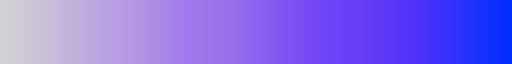

In [16]:
newcmp

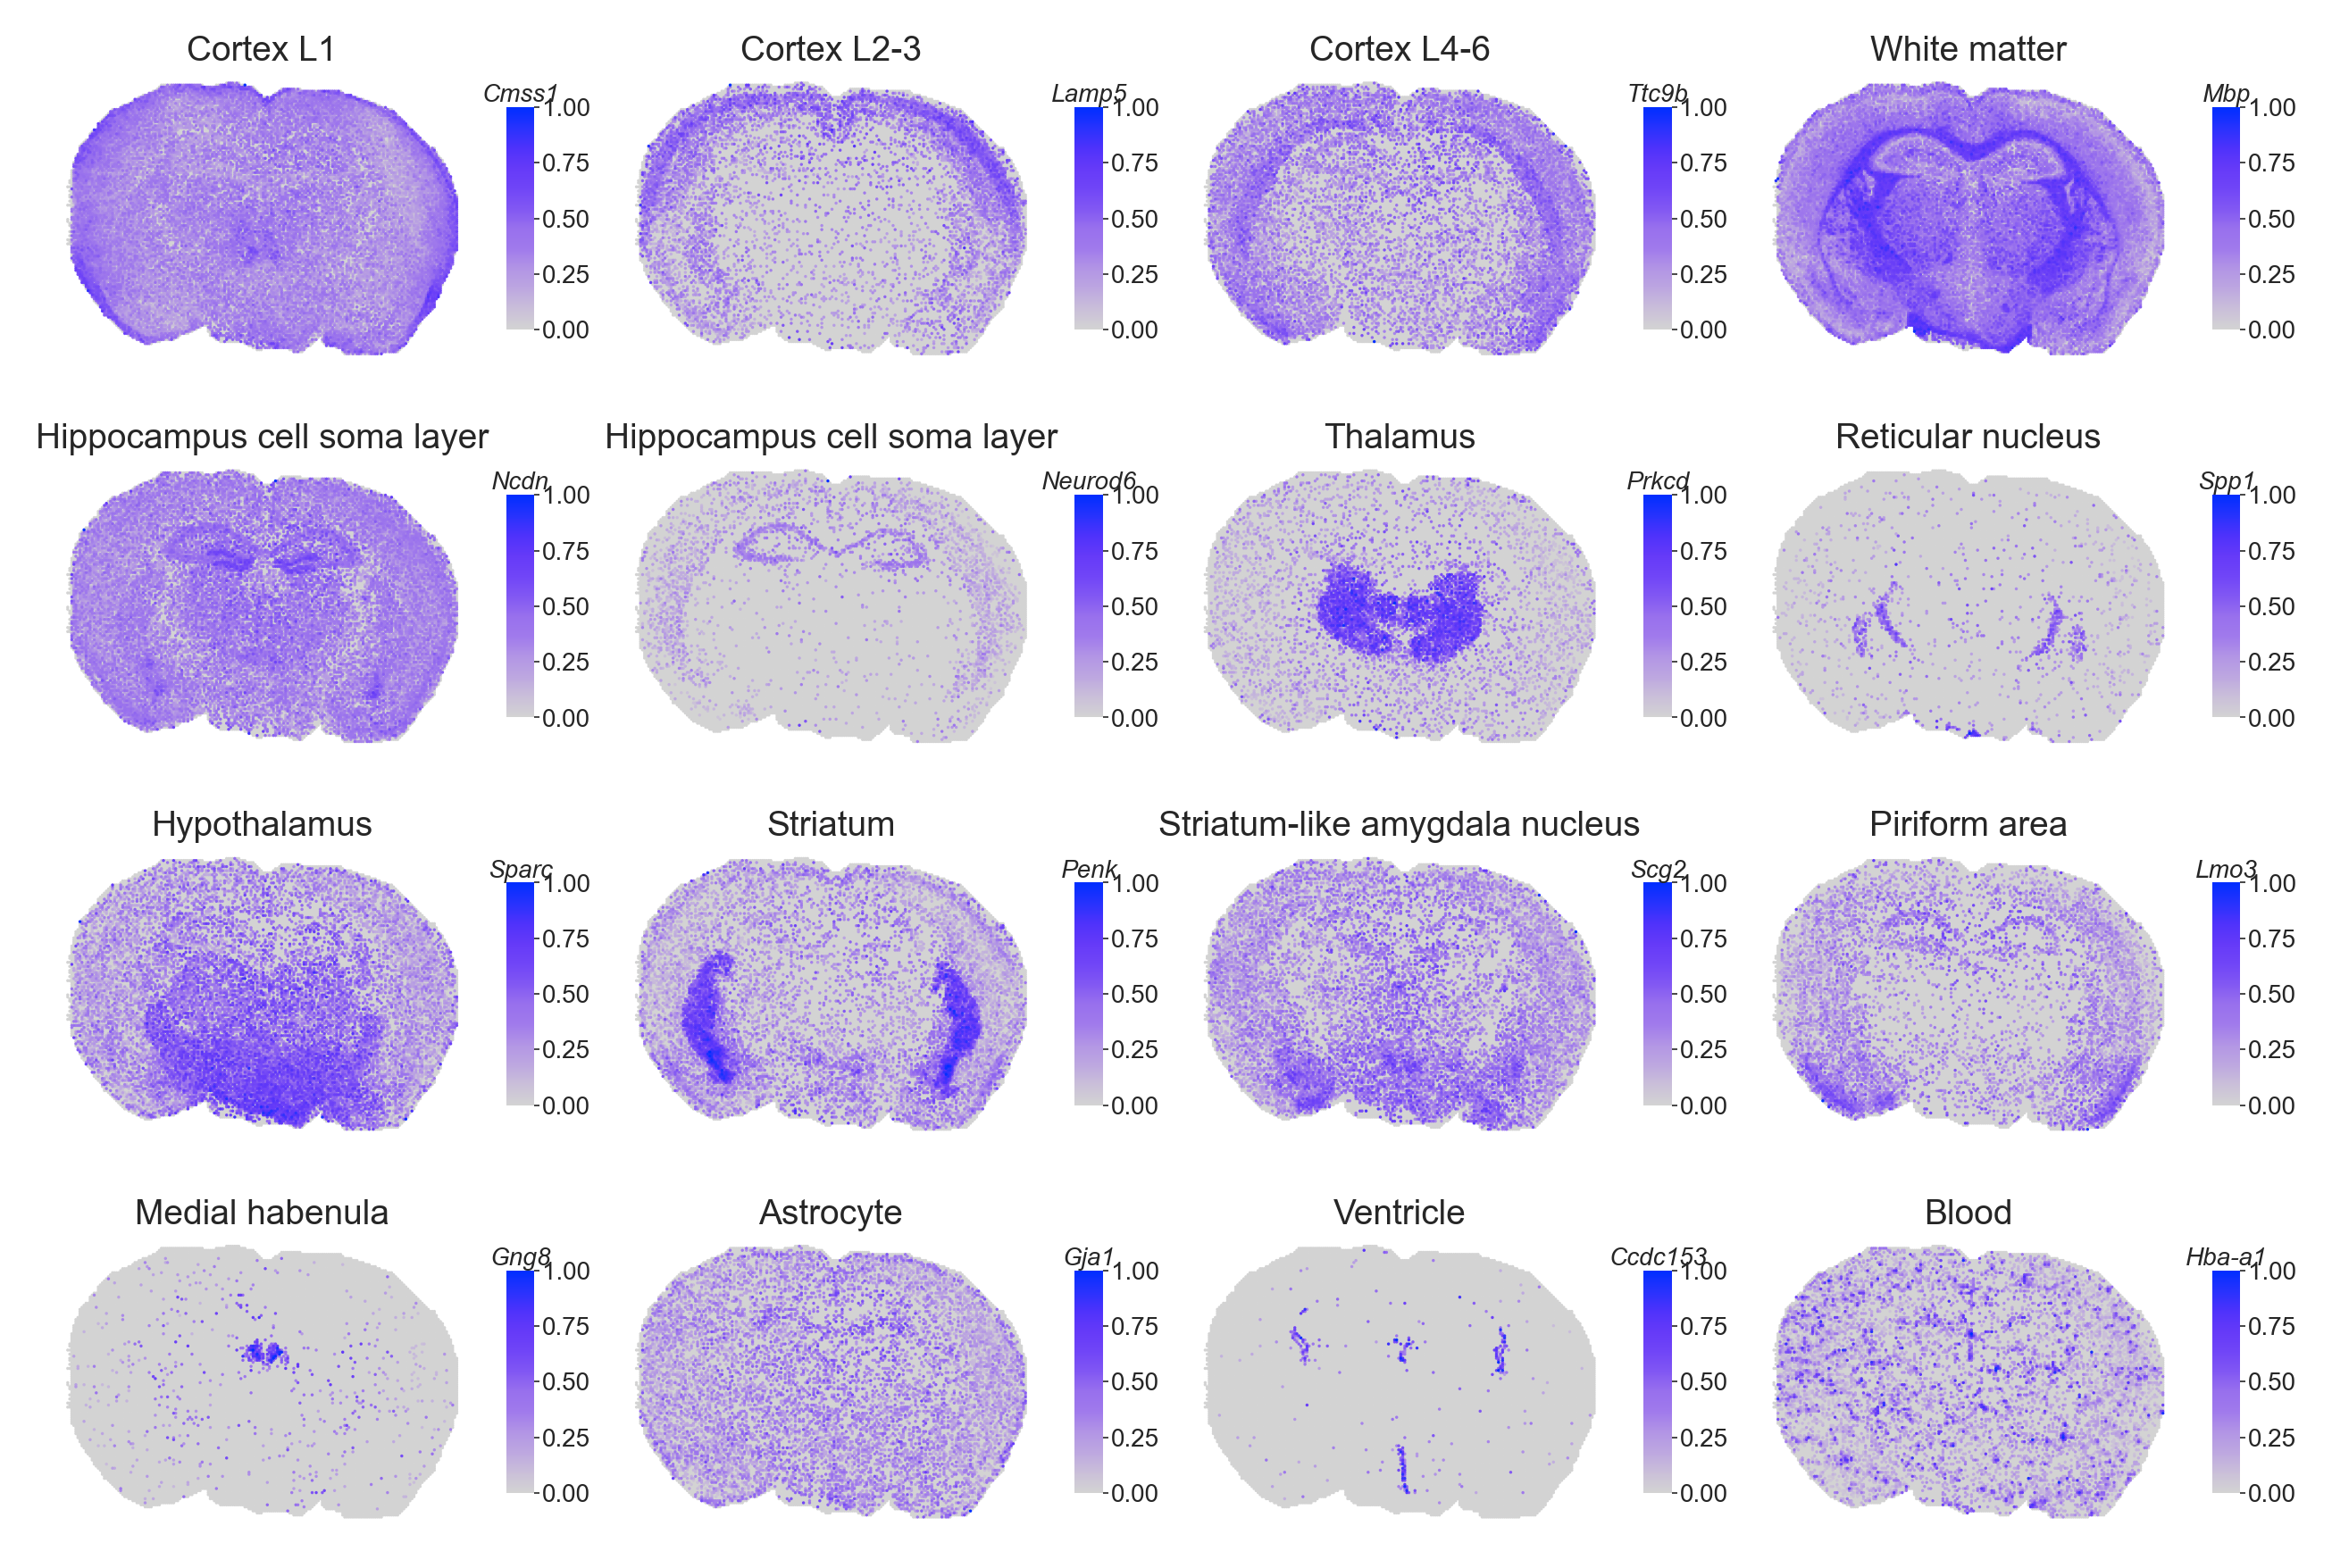

In [17]:
n_feat = len(gene_view)
plot_col_n = 4
    
fig, axs = plt.subplots(int(np.ceil(n_feat/plot_col_n)), plot_col_n,
                        figsize=(20*centimeter, 3.5*int(np.ceil(n_feat/plot_col_n))*centimeter), 
                        subplot_kw={'aspect': 'equal'})
axs = axs.ravel()

for iddd, i_gene in enumerate(gene_view):
    
    i_plot = sc.pl.spatial(adata_bin100, color=i_gene, spot_size=1.5, 
                           frameon=False, 
                           cmap=newcmp,                              #'magma', 
                           show=False, 
                           title = '',
                           ax=axs[iddd])
    
    axs[iddd].set_title(structure[iddd], pad=0, fontsize=7, )
    
    cbar_ax = fig.get_axes()[-1]
    cbar_ax.remove()

    # colorbar cax
    cax = axs[iddd].figure.add_axes(mtransforms.Bbox.from_extents(axs[iddd].get_position().x1 + 0.01,
                                  axs[iddd].get_position().y0+0.02,
                                  axs[iddd].get_position().x1 + 0.01 + 0.01,
                                  axs[iddd].get_position().y1-0.02), )# facecolor='none'
    plt.colorbar(i_plot[0].collections[0], cax=cax, orientation='vertical')
    cax.tick_params(direction='out', labelsize=5, length=1, width=0.3, pad=0.6, )
    cax.set_frame_on(False)
    cax.set_title(gene_view[iddd], pad=0, fontsize=5, fontdict={'style':'italic'})
#     cax.set_title('$\it{}$'.format(gene_view[iddd]), pad=0, fontsize=5)

title = 'all'
# plt.savefig('/media/bgi/liukeyin/SpaSEG/Fig3/Fig3_MB_bin100_marker_gene_{}.pdf'.format(title), 
#             bbox_inches='tight', format='pdf', dpi=400)